In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import awkward as ak

In [2]:
fname = "1f8b01b2-7689-4810-9eab-02ddc7bb0bc6.root"

In [3]:
with uproot.open(fname, timeout=120) as Hfile:
    print(Hfile.keys())
    Tree = Hfile["Events"]  # can access TTrees by name
    Events = Tree.arrays(library="ak", how="zip")

['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [4]:
Events.fields

['run',
 'luminosityBlock',
 'event',
 'bunchCrossing',
 'HTXS_njets25',
 'HTXS_njets30',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'BeamSpot_type',
 'BeamSpot_sigmaZ',
 'BeamSpot_sigmaZError',
 'BeamSpot_z',
 'BeamSpot_zError',
 'nboostedTau',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'DeepMETResolutionTune_phi',
 'DeepMETResolutionTune_pt',
 'DeepMETResponseTune_phi',
 'DeepMETResponseTune_pt',
 'nElectron',
 'nFatJet',
 'nFsrPhoton',
 'nGenJetAK8',
 'nGenJet',
 'nGenPart',
 'nGenProton',
 'nSubGenJetAK8',
 'Generator_id1',
 'Generator_id2',
 'Generator_binvar',
 'Generator_

In [20]:
Events.event

<Array [17556, 17550, 17553, ..., 811936, 811944, 811943] type='5165 * uint64'>

In [5]:
gen = Events.GenPart

In [6]:
photon = gen[gen.pdgId == 22]
mother_idx = photon.genPartIdxMother
mask = gen[mother_idx].pdgId == 35 
photon = photon[mask]
photon.fields

['genPartIdxMother',
 'statusFlags',
 'pdgId',
 'status',
 'eta',
 'mass',
 'phi',
 'pt']

In [23]:
ak.sum(ak.num(photon.pt) == 4)

5165

In [32]:
ak.sum(ak.num(A.pt) == 4)

85

In [8]:
A = gen[gen.pdgId == 35]

In [9]:
ak.where((ak.num(A.pt)==4))

(<Array [118, 140, 268, 272, 283, ..., 5027, 5070, 5075, 5093] type='85 * int64'>,)

In [10]:
A[118].pt

<Array [49.5, 150, 39.8, 89.8] type='4 * float32'>

In [11]:
Higgs = gen[(gen.pdgId == 25) & (gen.status == 62)]

In [26]:
ak.sum(ak.num(Higgs.pt)==0)

85

In [24]:
Higgs.pt

<Array [[20.4], [23.7], ..., [7.39], [25.2]] type='5165 * var * float32'>

In [34]:
np.unique(ak.flatten(A.status))

<Array [22, 62] type='2 * int32'>

In [13]:
%jsroot on
# Make a histogram
h = ROOT.TH1F("h", "Higgs p_{T};p_{T} [GeV];Events", 100, 0, 500)

# Flatten awkward array into a 1D numpy
for pt in ak.flatten(Higgs.pt):
    h.Fill(pt)

# Interactive canvas
c = ROOT.TCanvas("c", "c", 800, 600)
h.Draw("HIST")
c.Draw()

In [19]:
ak.sum(ak.num(A.pt) == 2)

5080

In [16]:
photon.pt

<Array [[9.44, 51, 20, 25.9], ..., [43.1, ...]] type='5165 * var * float32'>

In [35]:
photon.pt[ak.num(A.pt)==2]

<Array [[9.44, 51, 20, 25.9], ..., [43.1, ...]] type='5080 * var * float32'>

In [36]:
Reco_pho = Events.Photon

In [42]:
Reco_pho.pt[ak.num(A.pt)==2]

<Array [[48.3, 20.9], [11.6], ..., [43.7, 26.1]] type='5080 * var * float32'>

In [50]:
from ROOT import TLorentzVector

pt_cut_10 = Events.Photon.pt>10.0
pt_cut_18 = Events.Photon.pt>18.0
pt_cut_30 = Events.Photon.pt>30.0

nPhoton_cut_10 = ak.num(Events.Photon[pt_cut_10].pt)
nPhoton_cut_18 = ak.num(Events.Photon[pt_cut_18].pt)
nPhoton_cut_30 = ak.num(Events.Photon[pt_cut_30].pt)

gen = Events.GenPart
higgs_mask = (gen.pdgId == 25) & (gen.status == 62)
higgs = gen[higgs_mask]

higgs_pt = ak.flatten(higgs.pt)
higgs_eta = ak.flatten(higgs.eta)
higgs_phi = ak.flatten(higgs.phi)

is_A = (abs(gen.pdgId) == 35)

A = gen[is_A]

A_pt = A.pt
A_eta = A.eta
A_phi = A.phi

A_pt_1 = A_pt[:,0]
A_pt_2 = A_pt[:,1]
A_eta_1 = A_eta[:,0]
A_eta_2 = A_eta[:,1]
A_phi_1 = A_phi[:,0]
A_phi_2 = A_phi[:,1]

sorted_As = A[ak.argsort(A_pt, axis=1, ascending=False)]

leading_A_pt = sorted_As.pt[:,0]
subleading_A_pt = sorted_As.pt[:,1]
leading_A_eta = sorted_As.eta[:,0]
subleading_A_eta = sorted_As.eta[:,1]
leading_A_phi = sorted_As.phi[:,0]
subleading_A_phi = sorted_As.phi[:,1]

photon = gen[gen.pdgId == 22]
mother_idx = photon.genPartIdxMother
mask = gen[mother_idx].pdgId == 35 
photons_from_a = photon[mask]
photons_from_a = photons_from_a[ak.num(A.pt)==2]

photons_from_a = photons_from_a[:, :2]

pho_from_a_pt = photons_from_a.pt
pho_from_a_eta = photons_from_a.eta
pho_from_a_phi = photons_from_a.phi

pho_from_a_pt_1 = pho_from_a_pt[:, 0]
pho_from_a_pt_2 = pho_from_a_pt[:, 1]
pho_from_a_eta_1 = pho_from_a_eta[:, 0]
pho_from_a_eta_2 = pho_from_a_eta[:, 1]
pho_from_a_phi_1 = pho_from_a_phi[:, 0]
pho_from_a_phi_2 = pho_from_a_phi[:, 1]

sorted_photons = photons_from_a[ak.argsort(photons_from_a.pt, axis=1, ascending=False)]
lead_pt_pho_gen = sorted_photons.pt[:, 0]
sublead_pt_pho_gen = sorted_photons.pt[:, 1]
lead_eta_pho_gen = sorted_photons.eta[:, 0]
sublead_eta_pho_gen = sorted_photons.eta[:, 1]
lead_phi_pho_gen = sorted_photons.phi[:, 0]
sublead_phi_pho_gen = sorted_photons.phi[:, 1]

reco_photons = Events.Photon[ak.num(A.pt)==2]
has_photon = ak.num(reco_photons) >= 1
Reco_photons_all = reco_photons[has_photon]
Reco_pho_pt = ak.flatten(reco_photons.pt)
Reco_pho_eta = ak.flatten(reco_photons.eta)
Reco_pho_phi = ak.flatten(reco_photons.phi)

Reco_pho_pt_uf = reco_photons.pt
Reco_pho_eta_uf = reco_photons.eta
Reco_pho_phi_uf = reco_photons.phi

sorted_reco_photons = reco_photons[ak.argsort(reco_photons.pt, axis=1, ascending=False)]
Sorted_reco_photons_all = Reco_photons_all[ak.argsort(Reco_photons_all.pt, axis=1, ascending=False)]

Reco_photon_lead_pt_all = Sorted_reco_photons_all.pt[:,0]
Reco_photon_sublead_pt_all = ak.pad_none(Sorted_reco_photons_all.pt, 2)[:, 1]
Reco_photon_lead_eta_all = Sorted_reco_photons_all.eta[:,0]
Reco_photon_sublead_eta_all = ak.pad_none(Sorted_reco_photons_all.eta, 2)[:, 1]
Reco_photon_lead_phi_all = Sorted_reco_photons_all.phi[:,0]
Reco_photon_sublead_phi_all = ak.pad_none(Sorted_reco_photons_all.phi, 2)[:, 1]

has_two_photons = ak.num(sorted_reco_photons.pt) > 1

# Use the same mask for both
Reco_lead_pho_pt     = sorted_reco_photons.pt[has_two_photons][:, 0]
Reco_sublead_pho_pt  = sorted_reco_photons.pt[has_two_photons][:, 1]
Reco_lead_pho_eta    = sorted_reco_photons.eta[has_two_photons][:, 0]
Reco_sublead_pho_eta = sorted_reco_photons.eta[has_two_photons][:, 1]
Reco_lead_pho_phi    = sorted_reco_photons.phi[has_two_photons][:, 0]
Reco_sublead_pho_phi = sorted_reco_photons.phi[has_two_photons][:, 1]

def dR(eta1, phi1, eta2, phi2):
    d_eta = eta1 - eta2
    d_phi = phi1 - phi2
    return np.sqrt(d_eta**2 + d_phi**2)

dR_pho_lead = dR(lead_eta_pho_gen, lead_phi_pho_gen, Reco_pho_eta_uf, Reco_pho_phi_uf)
dR_pho_sublead = dR(sublead_eta_pho_gen, sublead_phi_pho_gen, Reco_pho_eta_uf, Reco_pho_phi_uf)

min_idx_1 = ak.argmin(dR_pho_lead, axis=1)
min_idx_2 = ak.argmin(dR_pho_sublead, axis=1)

photon_idx = ak.local_index(reco_photons)
mask_idx_1 = photon_idx == min_idx_1[:, None]
mask_idx_2 = photon_idx == min_idx_2[:, None]

mask_dR_1 = dR_pho_lead < 0.1
mask_dR_2 = dR_pho_sublead < 0.1

mask_sel_1 = mask_idx_1 & mask_dR_1
mask_sel_2 = mask_idx_2 & mask_dR_2


selected_photon_1 = ak.firsts(reco_photons[mask_sel_1])
selected_photon_2 = ak.firsts(reco_photons[mask_sel_2])


Gen_photon_pt_1 = ak.to_numpy(pho_from_a_pt_1[~ak.is_none(selected_photon_1.pt)])  # These are not all the Gen photons
Gen_photon_pt_2 = ak.to_numpy(pho_from_a_pt_2[~ak.is_none(selected_photon_2.pt)])

Genmatched_pho_1_pt  = ak.to_numpy(ak.fill_none(selected_photon_1.pt,  np.nan))
Genmatched_pho_2_pt  = ak.to_numpy(ak.fill_none(selected_photon_2.pt,  np.nan))
Genmatched_pho_1_eta = ak.to_numpy(ak.fill_none(selected_photon_1.eta, np.nan))
Genmatched_pho_2_eta = ak.to_numpy(ak.fill_none(selected_photon_2.eta, np.nan))
Genmatched_pho_1_phi = ak.to_numpy(ak.fill_none(selected_photon_1.phi, np.nan))
Genmatched_pho_2_phi = ak.to_numpy(ak.fill_none(selected_photon_2.phi, np.nan))

both_matched_mask = ~ak.is_none(selected_photon_1.pt) & ~ak.is_none(selected_photon_2.pt)


Genmatched_photon_1_clean_both = selected_photon_1[both_matched_mask]
Genmatched_photon_2_clean_both = selected_photon_2[both_matched_mask]

Genmatched_pho_1_pt_both  = ak.to_numpy(Genmatched_photon_1_clean_both.pt)
Genmatched_pho_2_pt_both  = ak.to_numpy(Genmatched_photon_2_clean_both.pt)
Genmatched_pho_1_eta_both = ak.to_numpy(Genmatched_photon_1_clean_both.eta)
Genmatched_pho_2_eta_both = ak.to_numpy(Genmatched_photon_2_clean_both.eta)
Genmatched_pho_1_phi_both = ak.to_numpy(Genmatched_photon_1_clean_both.phi)
Genmatched_pho_2_phi_both = ak.to_numpy(Genmatched_photon_2_clean_both.phi)
Genmatched_pho_1_mass_both = np.zeros_like(Genmatched_pho_2_phi_both, dtype=np.float32)
Genmatched_pho_2_mass_both = np.zeros_like(Genmatched_pho_2_phi_both, dtype=np.float32)

# Allocate output array
invmasses_diphoton = np.empty(len(Genmatched_pho_1_pt_both), dtype=np.float32)

# TLorentzVectors
vec1 = TLorentzVector()
vec2 = TLorentzVector()

for i in range(len(Genmatched_pho_1_pt_both)):
    vec1.SetPtEtaPhiM(
        Genmatched_pho_1_pt_both[i],
        Genmatched_pho_1_eta_both[i],
        Genmatched_pho_1_phi_both[i],
        Genmatched_pho_1_mass_both[i],
    )
    vec2.SetPtEtaPhiM(
        Genmatched_pho_2_pt_both[i],
        Genmatched_pho_2_eta_both[i],
        Genmatched_pho_2_phi_both[i],
        Genmatched_pho_2_mass_both[i],
    )
    invmasses_diphoton[i] = (vec1 + vec2).M()

gen_invmasses_diphoton = np.empty(len(pho_from_a_pt_1), dtype=np.float32)

pho_from_a_mass_1 = np.zeros_like(pho_from_a_pt_1, dtype=np.float32)
pho_from_a_mass_2 = np.zeros_like(pho_from_a_pt_1, dtype=np.float32)

# Masks for valid (non-NaN) gen-level photons and b-quarks
valid_mask_gg = ~np.isnan(pho_from_a_pt_1 + pho_from_a_eta_1 + pho_from_a_phi_1 + pho_from_a_mass_1 +
                        pho_from_a_pt_2 + pho_from_a_eta_2 + pho_from_a_phi_2 + pho_from_a_mass_2)

# Filter the arrays
pho_1_pt = pho_from_a_pt_1[valid_mask_gg]
pho_1_eta = pho_from_a_eta_1[valid_mask_gg]
pho_1_phi = pho_from_a_phi_1[valid_mask_gg]
pho_1_mass = pho_from_a_mass_1[valid_mask_gg]

pho_2_pt = pho_from_a_pt_2[valid_mask_gg]
pho_2_eta = pho_from_a_eta_2[valid_mask_gg]
pho_2_phi = pho_from_a_phi_2[valid_mask_gg]
pho_2_mass = pho_from_a_mass_2[valid_mask_gg]

# Prepare output arrays
gen_invmasses_diphoton = np.empty(len(pho_1_pt), dtype=np.float32)

p4_pho_1 = TLorentzVector()
p4_pho_2 = TLorentzVector()


for i, (PT1, ETA1, PHI1, M1, PT2, ETA2, PHI2, M2) in enumerate(zip(pho_1_pt, pho_1_eta, pho_1_phi, pho_1_mass,
                                                                pho_2_pt, pho_2_eta, pho_2_phi, pho_2_mass)):
    p4_pho_1.SetPtEtaPhiM(PT1, ETA1, PHI1, M1)
    p4_pho_2.SetPtEtaPhiM(PT2, ETA2, PHI2, M2)
    gen_invmasses_diphoton[i] = (p4_pho_1 + p4_pho_2).M()

In [51]:
lead_pt_pho_gen

<Array [51, 15.6, 43.2, 36.6, ..., 28.6, 48.8, 43.1] type='5080 * float32'>

In [52]:
sublead_pt_pho_gen

<Array [9.44, 7.55, 7.92, 12.9, ..., 27.5, 10, 8.28] type='5080 * float32'>

In [55]:
len(Genmatched_pho_1_pt)

5080

In [56]:
len(Genmatched_pho_2_pt)

5080

In [57]:
Events_ggH = ak.from_parquet("AllDatasets_ggH.parquet")

In [58]:
Events_ggH.fields

['nEvents',
 'pu_true',
 'nPhoton',
 'nPhoton_cut_10',
 'nPhoton_cut_18',
 'nPhoton_cut_30',
 'higgs_pt',
 'higgs_eta',
 'higgs_phi',
 'A_pt_1',
 'A_pt_2',
 'A_eta_1',
 'A_eta_2',
 'A_phi_1',
 'A_phi_2',
 'leading_A_pt',
 'subleading_A_pt',
 'leading_A_eta',
 'subleading_A_eta',
 'leading_A_phi',
 'subleading_A_phi',
 'pho_from_a_pt_1',
 'pho_from_a_pt_2',
 'pho_from_a_eta_1',
 'pho_from_a_eta_2',
 'pho_from_a_phi_1',
 'pho_from_a_phi_2',
 'lead_pt_pho_gen',
 'sublead_pt_pho_gen',
 'lead_eta_pho_gen',
 'sublead_eta_pho_gen',
 'lead_phi_pho_gen',
 'sublead_phi_pho_gen',
 'Reco_pho_pt',
 'Reco_pho_eta',
 'Reco_pho_phi',
 'Reco_photon_lead_pt_all',
 'Reco_photon_sublead_pt_all',
 'Reco_photon_lead_eta_all',
 'Reco_photon_sublead_eta_all',
 'Reco_photon_lead_phi_all',
 'Reco_photon_sublead_phi_all',
 'Reco_lead_pho_pt',
 'Reco_sublead_pho_pt',
 'Reco_lead_pho_eta',
 'Reco_sublead_pho_eta',
 'Reco_lead_pho_phi',
 'Reco_sublead_pho_phi',
 'gen_photon_from_a_1_pt',
 'gen_photon_from_a_2_pt',


In [59]:
Events_ggH.dataset

<Array ['M15_Run3Summer22EENanoAODv13', ...] type='20 * string'>

In [62]:
data_1 = Events_ggH[Events_ggH.dataset == "M15_Run3Summer22EENanoAODv13"]

In [ ]:
data_1.fields

['nEvents',
 'pu_true',
 'nPhoton',
 'nPhoton_cut_10',
 'nPhoton_cut_18',
 'nPhoton_cut_30',
 'higgs_pt',
 'higgs_eta',
 'higgs_phi',
 'A_pt_1',
 'A_pt_2',
 'A_eta_1',
 'A_eta_2',
 'A_phi_1',
 'A_phi_2',
 'leading_A_pt',
 'subleading_A_pt',
 'leading_A_eta',
 'subleading_A_eta',
 'leading_A_phi',
 'subleading_A_phi',
 'pho_from_a_pt_1',
 'pho_from_a_pt_2',
 'pho_from_a_eta_1',
 'pho_from_a_eta_2',
 'pho_from_a_phi_1',
 'pho_from_a_phi_2',
 'lead_pt_pho_gen',
 'sublead_pt_pho_gen',
 'lead_eta_pho_gen',
 'sublead_eta_pho_gen',
 'lead_phi_pho_gen',
 'sublead_phi_pho_gen',
 'Reco_pho_pt',
 'Reco_pho_eta',
 'Reco_pho_phi',
 'Reco_photon_lead_pt_all',
 'Reco_photon_sublead_pt_all',
 'Reco_photon_lead_eta_all',
 'Reco_photon_sublead_eta_all',
 'Reco_photon_lead_phi_all',
 'Reco_photon_sublead_phi_all',
 'Reco_lead_pho_pt',
 'Reco_sublead_pho_pt',
 'Reco_lead_pho_eta',
 'Reco_sublead_pho_eta',
 'Reco_lead_pho_phi',
 'Reco_sublead_pho_phi',
 'gen_photon_from_a_1_pt',
 'gen_photon_from_a_2_pt',


In [65]:
len(data_1.nEvents[0])

498428

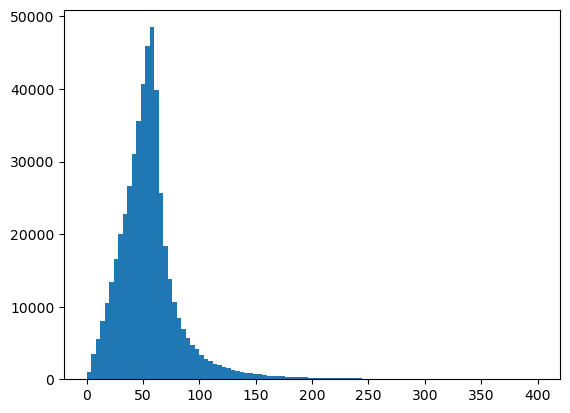

In [74]:
plt.hist(data_1.A_pt_1[0], bins = 100, range=(0, 400));

In [1]:
import awkward as ak
import ROOT
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%jsroot on
import ROOT

# Open the ROOT files
f1 = ROOT.TFile.Open("hist_output_WH.root")
f2 = ROOT.TFile.Open("hist_output_ggH.root")

# Navigate into the directories and get histograms
# Replace directory names with what f->ls() shows for your files
h1 = f1.Get("M20_RunIISummer20UL16NanoAODAPVv9/h_higgs_pt")
h2 = f2.Get("M20_Run3Summer22NanoAODv13/h_higgs_pt")

if not h1 or not h2:
    raise RuntimeError("Could not load histograms!")

# Clone histograms so we don't mess with originals
h1 = h1.Clone("h1_clone")
h2 = h2.Clone("h2_clone")

# Normalize histograms to unity
if h1.Integral() > 0:
    h1.Scale(1.0 / h1.Integral())
if h2.Integral() > 0:
    h2.Scale(1.0 / h2.Integral())

# Apply cross section × luminosity scaling
lumi_Run2016 = 35900  # pb^-1 (example: 35.9 fb^-1 for 2016)
lumi_Run2022 = 34700

xsec1 = 1.373   # WH cross section (pb)
xsec2 = 48.58   # ggH cross section (pb)

h1.Scale(xsec1 * lumi_Run2016)
h2.Scale(xsec2 * lumi_Run2022)

# Style
h1.SetLineColor(ROOT.kRed)
h1.SetLineWidth(2)
h2.SetLineColor(ROOT.kBlue)
h2.SetLineWidth(2)

# Disable the stats box
ROOT.gStyle.SetOptStat(0)

# Axis labels
h1.GetXaxis().SetTitle("Higgs p_{T} [GeV]")
h1.GetYaxis().SetTitle("Expected Events")

# Adjust y-max to leave space for legend
max_y = max(h1.GetMaximum(), h2.GetMaximum())
h1.SetMaximum(1.2 * max_y)

# Draw histograms
c = ROOT.TCanvas("c", "Higgs pt comparison", 800, 600)
h1.Draw("HIST")
h2.Draw("HIST SAME")

# Legend (shift a bit to avoid overlap)
leg = ROOT.TLegend(0.55, 0.7, 0.85, 0.85)
leg.SetTextSize(0.02)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.AddEntry(h1, "WH (2016 UL)", "l")
leg.AddEntry(h2, "ggH (2022 Run3)", "l")
leg.Draw()

c.Draw()

c.SaveAs("higgs_pt_comparison.png")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file higgs_pt_comparison.png has been created


In [9]:
import ROOT

def compare_hists(
    file1, dir1, file2, dir2,
    histname="h_higgs_pt",
    xsec1=1.0, xsec2=1.0,
    lumi1=1.0, lumi2=1.0,
    leg1="Sample 1", leg2="Sample 2",
    xaxis_label="X-axis", yaxis_label="Events",
    rebin=1,
    outname="comparison.png"
):
    """
    Compare histograms from two ROOT files:
    - Opens files and directories
    - Normalizes, scales with xsec*lumi
    - Rebins if required
    - Draws and saves as PNG
    """

    # Open ROOT files
    f1 = ROOT.TFile.Open(file1)
    f2 = ROOT.TFile.Open(file2)

    # Get histograms
    h1 = f1.Get(f"{dir1}/{histname}")
    h2 = f2.Get(f"{dir2}/{histname}")

    if not h1 or not h2:
        raise RuntimeError("Could not load histograms!")

    # Clone to avoid modifying originals
    h1 = h1.Clone("h1_clone")
    h2 = h2.Clone("h2_clone")

    # Rebin
    if rebin > 1:
        h1.Rebin(rebin)
        h2.Rebin(rebin)

    # Normalize to unity first
    if h1.Integral() > 0:
        h1.Scale(1.0 / h1.Integral())
    if h2.Integral() > 0:
        h2.Scale(1.0 / h2.Integral())

    # Scale by xsec × lumi
    h1.Scale(xsec1 * lumi1)
    h2.Scale(xsec2 * lumi2)

    # Style
    h1.SetLineColor(ROOT.kRed)
    h1.SetLineWidth(2)
    h2.SetLineColor(ROOT.kBlue)
    h2.SetLineWidth(2)

    # Remove stats box
    ROOT.gStyle.SetOptStat(0)

    # Axis labels
    h1.GetXaxis().SetTitle(xaxis_label)
    h1.GetYaxis().SetTitle(yaxis_label)

    # Adjust y-max
    max_y = max(h1.GetMaximum(), h2.GetMaximum())
    h1.SetMaximum(1.2 * max_y)

    # Draw
    c = ROOT.TCanvas("c", "Comparison", 800, 600)
    h1.Draw("HIST")
    h2.Draw("HIST SAME")

    # Legend
    leg = ROOT.TLegend(0.6, 0.75, 0.85, 0.85)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetFillStyle(0)
    leg.AddEntry(h1, leg1, "l")
    leg.AddEntry(h2, leg2, "l")
    leg.Draw()

    c.SaveAs(outname)
    print(f"Saved plot to {outname}")


In [10]:
compare_hists(
    file1="hist_output_WH.root",
    dir1="M20_RunIISummer20UL16NanoAODAPVv9",
    file2="hist_output_ggH.root",
    dir2="M20_Run3Summer22NanoAODv13",
    histname="h_higgs_pt",
    xsec1=1.373,  # WH (pb)
    xsec2=48.58,  # ggH (pb)
    lumi1=35900,  # Run2016 UL (pb^-1)
    lumi2=34700,  # Run3 2022 (pb^-1)
    leg1="WH (2016 UL)",
    leg2="ggH (2022 Run3)",
    xaxis_label="Higgs p_{T} [GeV]",
    yaxis_label="Expected Events",
    rebin=2,
    outname="higgs_pt_WH_vs_ggH.png"
)


Saved plot to higgs_pt_WH_vs_ggH.png


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file higgs_pt_WH_vs_ggH.png has been created
